In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, plot, iplot
from statsmodels.stats.multicomp import MultiComparison
from scipy import stats
import numpy as np
import math
import scipy


# SEED TRUE 1st iteration

In [2]:
path = "C:\\Users\\amichal\\OneDrive\\Work\\PhD\\PhD- Critical Mass\\Data\\NTUA Simulation Results"

In [6]:
resultsa= pd.read_csv(path + "\\results_first_time_mp_NTUA_repeat10_5to1000_step5_simstep1mn.csv", sep = ",", encoding="1253")


In [7]:
resultsb = pd.read_csv(path + "\\results_first_time_mp_NTUA_repeat100_5to1000_step5_simstep1mn.csv", sep = ",", encoding="1253")

In [9]:
results_notimes = pd.read_csv(path + "\\results_no_times_NTUA_repeat100_5to1000_step5_simstep1mn.csv", sep = ",", encoding="1253")

In [11]:
resultsa.columns = ["iteration", "nb_people", "days_missing", "minutes_missing"]
resultsb.columns = ["iteration", "nb_people", "days_missing", "minutes_missing"]

In [12]:
results_notimes.columns = ["iteration", "nb_people", "Times_Found", "Times_Found_Walking", "Times_Found_Driving", "Times_Found_Resting"]

In [14]:
resultsa_min40 = resultsa.loc[resultsa.days_missing <=40]
len(resultsa)- len(resultsa_min40)

5

In [15]:
resultsb_min40 = resultsb.loc[resultsb.days_missing <=40]
len(resultsb)- len(resultsb_min40)

27

# Exploration

#### 10 iterations step 1mn

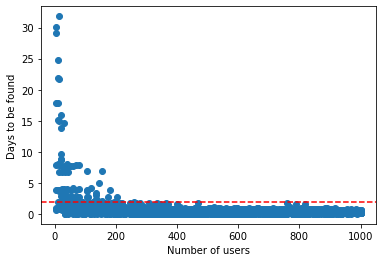

In [377]:
ax = resultsa_min40.plot(x='nb_people', y='days_missing', style='o', legend = False)
ax.set(xlabel='Number of users', ylabel='Days to be found')
plt.axhline(y=2, color='r', linestyle='dashed', label = "Baseline")


In [18]:
resultsb_min40.loc[(resultsb_min40.nb_people >300) & (resultsb_min40.days_missing >2)]

,iteration,nb_people,days_missing,minutes_missing
6121,6121,310,2.375000,3420.0
6292,6292,315,2.052778,2956.0
7692,7692,385,4.495139,6473.0
7895,7895,395,4.625000,6660.0
8011,8011,405,2.551389,3674.0
8277,8277,415,2.547917,3669.0
8570,8570,430,2.395139,3449.0
8898,8898,445,2.364583,3405.0
14044,14044,705,29.371528,42295.0
14059,14059,705,14.320833,20622.0


#### 100 iterations step 1mn

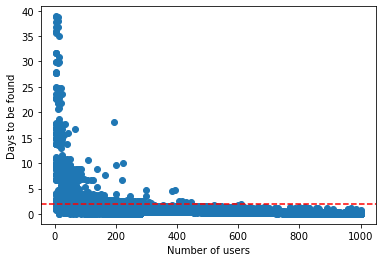

In [27]:
ax = resultsb_min40.plot(x='nb_people', y='days_missing', style='o', legend=False)
ax.set(xlabel='Number of users', ylabel='Days to be found')
plt.axhline(y=2, color='r', linestyle='dashed', label = "Baseline")


In [28]:
resultsb_min40.loc[(resultsb_min40.nb_people >100) & (resultsb_min40.days_missing >10)]

,iteration,nb_people,days_missing,minutes_missing
2139,2139,110,10.534722,15170.0
3828,3828,195,18.143750,26127.0
4418,4418,225,10.073611,14506.0


# Mean and Median plot

[Text(0.5, 1.0, 'Median values, 100 repetitions')]

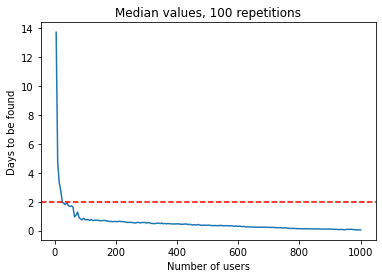

In [32]:
ax = resultsb_min40.groupby("nb_people")["days_missing"].median().plot()
plt.axhline(y=2, color='r', linestyle='dashed')
ax.set(xlabel='Number of users', ylabel='Days to be found')
ax.set(title = "Median values, 100 repetitions")

[Text(0.5, 1.0, 'Mean values, 100 repetitions')]

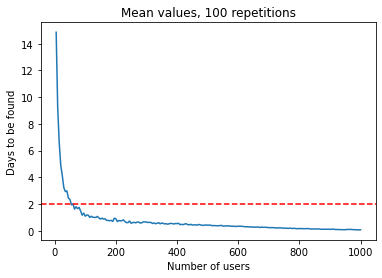

In [33]:
ax = resultsb_min40.groupby("nb_people")["days_missing"].mean().plot()
plt.axhline(y=2, color='r', linestyle='dashed')
ax.set(xlabel='Number of users', ylabel='Days to be found')
ax.set(title = "Mean values, 100 repetitions")

[Text(0.5, 1.0, 'Median values, 10 repetitions')]

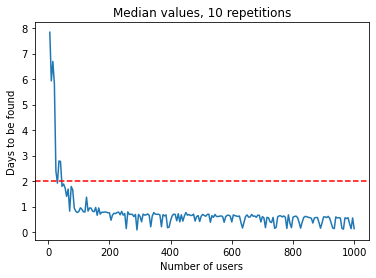

In [36]:
ax = resultsa_min40.groupby("nb_people")["days_missing"].median().plot()
plt.axhline(y=2, color='r', linestyle='dashed')
ax.set(xlabel='Number of users', ylabel='Days to be found')
ax.set(title = "Median values, 10 repetitions")

[Text(0.5, 1.0, 'Mean values, 10 repetitions')]

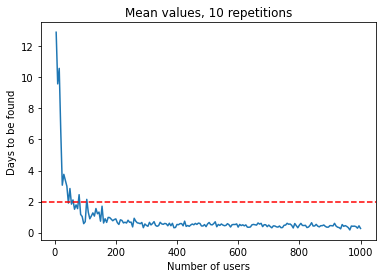

In [37]:
ax = resultsa_min40.groupby("nb_people")["days_missing"].mean().plot()
plt.axhline(y=2, color='r', linestyle='dashed')
ax.set(xlabel='Number of users', ylabel='Days to be found')
ax.set(title = "Mean values, 10 repetitions")

In [426]:
resultsb_min40.groupby("nb_people")["days_missing"].agg(['min', 'max', 'mean', 'median', 'std']).to_excel('./resultsNTUA_stats_100iterations.xlsx')

In [427]:
resultsa_min40.groupby("nb_people")["days_missing"].agg(['min', 'max', 'mean', 'median', 'std']).to_excel('./resultsNTUA_stats_10iterations.xlsx')

In [38]:
resultsa_min40.groupby("nb_people")["days_missing"].agg(['min', 'max', 'mean', 'median', 'std'])

,min,max,mean,median,std
nb_people,,,,,
5,0.659722,30.054167,12.912103,7.838194,12.766745
10,0.817361,24.777778,9.583403,5.931597,9.443263
15,0.829861,31.823611,10.584491,6.693750,10.306111
20,0.914583,15.950694,6.553819,5.807986,5.579245
25,0.634722,7.783333,3.055625,2.392014,2.466471
...,...,...,...,...,...
980,0.113889,0.699306,0.417986,0.564583,0.246467
985,0.111111,0.783333,0.387639,0.332639,0.294563
990,0.002778,0.600000,0.284306,0.136458,0.239061


# Boxplots

### Boxplot iteration 10

In [41]:
results_500 = resultsa_min40.loc[resultsa_min40.nb_people <=500]

In [42]:
resultsa_25 =results_500.loc[((results_500.nb_people)%20 == 0)]

[Text(0.5, 0, 'Number of users'), Text(0, 0.5, 'Days to be found')]

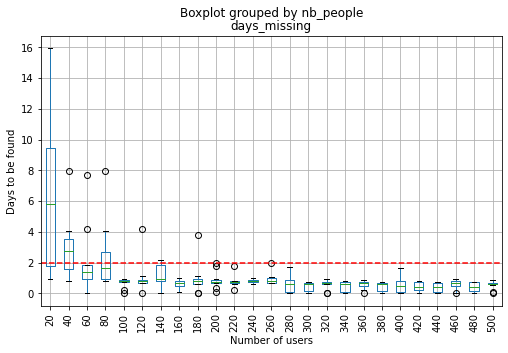

In [43]:
ax = resultsa_25.boxplot(column=['days_missing'], by=['nb_people'], rot = 90, figsize = (8,5))
plt.axhline(y=2, color='r', linestyle='dashed', label = "Baseline")
ax.set(xlabel='Number of users', ylabel='Days to be found')

### Boxplot iteration 100

In [44]:
resultsb_500 = resultsb_min40.loc[resultsb_min40.nb_people <=500]

In [45]:
resultsb_20 =resultsb_500.loc[((resultsb_500.nb_people)%20 == 0)]

[Text(0.5, 0, 'Number of users'), Text(0, 0.5, 'Days to be found')]

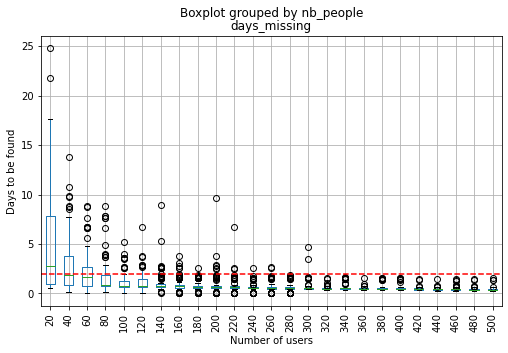

In [46]:
ax = resultsb_20.boxplot(column=['days_missing'], by=['nb_people'], rot = 90, figsize = (8,5))
plt.axhline(y=2, color='r', linestyle='dashed', label = "Baseline")
ax.set(xlabel='Number of users', ylabel='Days to be found')

## Exploration & Fitting to polynomials (without outliers)

Inspiration from https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly

Στοιχειώδης συναρτήσεις link https://books.google.gr/books?id=6vZVCwAAQBAJ&pg=PA2&lpg=PA2&dq=%CF%85%CF%80%CE%B5%CF%81%CE%B2%CE%BF%CE%BB%CE%B7+%CF%80%CE%B1%CF%81%CE%B1%CE%B2%CE%BF%CE%BB%CE%B7+%CE%B5%CE%BA%CE%B8%CE%B5%CF%84%CE%B9%CE%BA%CE%B5%CF%82+%CF%83%CF%85%CE%BD%CE%B1%CF%81%CF%84%CE%B7%CF%83%CE%B5%CE%B9%CF%82&source=bl&ots=DfCsQQZa65&sig=ACfU3U0EoWI9MXOLGBKEJe_Q6KTKHvyH6Q&hl=en&sa=X&ved=2ahUKEwiSherducX2AhWIQ_EDHe0oCfwQ6AF6BAgwEAM#v=onepage&q=%CF%85%CF%80%CE%B5%CF%81%CE%B2%CE%BF%CE%BB%CE%B7%20%CF%80%CE%B1%CF%81%CE%B1%CE%B2%CE%BF%CE%BB%CE%B7%20%CE%B5%CE%BA%CE%B8%CE%B5%CF%84%CE%B9%CE%BA%CE%B5%CF%82%20%CF%83%CF%85%CE%BD%CE%B1%CF%81%CF%84%CE%B7%CF%83%CE%B5%CE%B9%CF%82&f=false

In [63]:
df = resultsb_min40.groupby("nb_people")["days_missing"].median().reset_index()
x = df.nb_people
y = df.days_missing

In [32]:
#df

In [64]:
np.polyfit(np.log(x), y, 1)  #polynomial fitting

array([-0.79200217,  5.23912979])

In [65]:
y_fitted= -0.79200217*np.log(x) + 5.23912979     #nope

In [29]:

#y_fitted= -1.28374022*np.log(x) + 9.65342544

In [66]:
np.polyfit(x, np.log(y), 1)   

array([-0.00292224,  0.38266761])

In [67]:
y_fitted = np.exp(-0.00292224) * np.exp(0.38266761 * x)  #nope

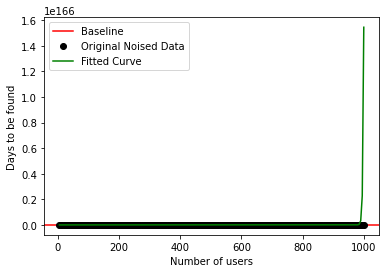

In [68]:
plt.figure()
#ax = results_outliers.groupby("nb_people")["days_missing"].median().plot()
plt.axhline(y=2, color='r', linestyle='-', label = "Baseline")
ax = plt.plot(x, y, 'ko', label="Original Noised Data")
#ax.set(xlabel='Number of users', ylabel='Days to be found')
plt.xlabel("Number of users")
plt.ylabel("Days to be found")
plt.plot(x, y_fitted, 'g-', label="Fitted Curve")
plt.legend()
plt.show()
#ax.plot(x,y)

In [69]:
np.linalg.norm(y-y_fitted)

inf

In [70]:
np.polyfit(x, np.log(y), 1, w=np.sqrt(y))

array([-0.00430121,  1.08493381])

In [71]:
y_fitted = np.exp(-0.00430121) * np.exp(1.08493381*1/(10**3) * x)   #nope

In [72]:
from scipy.optimize import curve_fit

In [73]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [87]:
#yn = y + 0.2*np.random.normal(size=len(x))

In [74]:
popt, pcov = curve_fit(func, x, y)

C:\Users\amichal\Anaconda3\envs\phd_env\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning:

overflow encountered in exp



In [75]:
y_fitted = func(x, *popt)

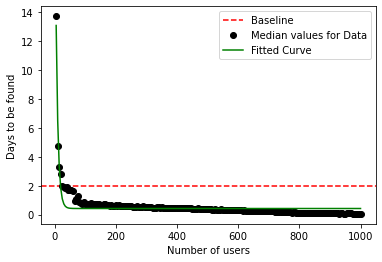

In [76]:
plt.figure()
plt.axhline(y=2, color='r', linestyle='dashed', label = "Baseline")
plt.plot(x, y, 'ko', label="Median values for Data")
#plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.xlabel("Number of users")
plt.ylabel("Days to be found")
plt.plot(x, y_fitted, 'g-', label='Fitted Curve')
plt.legend()
plt.show()

In [77]:
np.linalg.norm(y-y_fitted)

5.169584126459791

# source: https://scientific-python-101.readthedocs.io/scipy/fitting_curves.html

In [78]:
def hyperbola(x, a, q):
    return a/x + q

In [79]:
y

0      13.695139
1       4.715972
2       3.302083
3       2.786458
4       1.969097
         ...    
195     0.073958
196     0.054514
197     0.051042
198     0.059722
199     0.055556
Name: days_missing, Length: 200, dtype: float64

In [80]:
fit_params, pcov = scipy.optimize.curve_fit(hyperbola, x, y)
y_fit = hyperbola(x, *fit_params)

In [81]:
fit_params   # to a 

array([61.51415098,  0.18446132])

In [82]:
print(pcov)

[[ 7.61691876e-01 -4.47724854e-03]
 [-4.47724854e-03  2.49826788e-04]]


In [83]:
np.sqrt(np.diag(pcov)) #p_sigma error measure 
#https://stackoverflow.com/questions/43561036/how-do-i-use-pcov-in-python-to-get-errors-for-each-parameter

array([0.87274961, 0.01580591])

In [84]:
pcov

array([[ 7.61691876e-01, -4.47724854e-03],
       [-4.47724854e-03,  2.49826788e-04]])

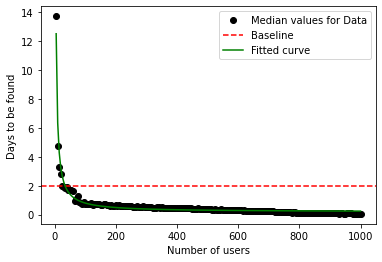

In [85]:
plt.figure()
plt.plot(x.head(n=200), y.head(n=200), 'ko', label="Median values for Data")
plt.axhline(y=2, color='r', linestyle='dashed', label = "Baseline")
#plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.plot(x.head(n=200), y_fit.head(n=200), '-g', label='Fitted curve')
plt.xlabel("Number of users")
plt.ylabel("Days to be found")
plt.legend()
plt.show()

In [86]:
#compute the error
#  https://stats.stackexchange.com/questions/38115/how-do-i-interpret-the-covariance-matrix-from-a-curve-fit
np.linalg.norm(y-y_fit)  #searching for the lowest value

2.975058249950768

# other sources
https://www.w3schools.com/python/python_ml_polynomial_regression.asp

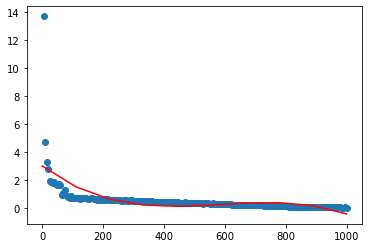

In [87]:
mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(0, 1000, 10)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline), c = "r")

In [88]:
print(mymodel)

           3             2
-1.72e-08 x + 3.035e-05 x - 0.01657 x + 3.022


In [89]:
np.linalg.norm(y-mymodel(x))  
#https://stats.stackexchange.com/questions/38115/how-do-i-interpret-the-covariance-matrix-from-a-curve-fit

11.883223206009207

In [90]:
import sklearn
from sklearn.metrics import r2_score
sklearn.metrics.r2_score(y, mymodel(x))

0.3884967484930023

# Chapter 2:  Batch number of times found

In [94]:
results_notimes = pd.read_csv(path + "\\results_no_times_NTUA_repeat100_5to1000_step5_simstep1mn.csv", sep = ",", encoding="1253")

In [95]:
len(results_notimes)

20000

<AxesSubplot:xlabel='nb_people'>

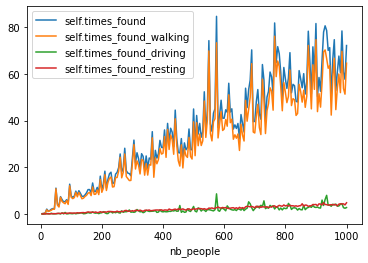

In [96]:
results_notimes.drop('int(self)', axis=1).groupby("nb_people").mean().plot()

<AxesSubplot:xlabel='nb_people'>

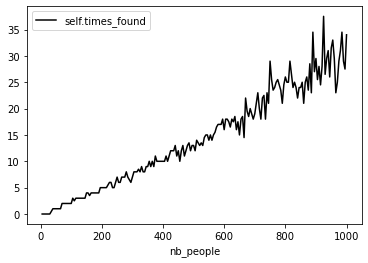

In [97]:
df = results_notimes[["nb_people","self.times_found"]]
df.groupby("nb_people").median().plot(color = "black")

<AxesSubplot:xlabel='nb_people'>

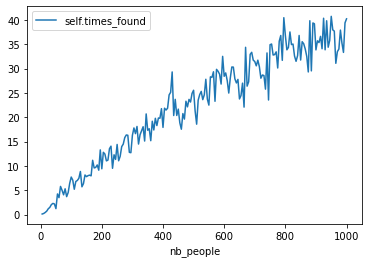

In [101]:
#results_notimes_out.drop('int(self)', axis=1).groupby("nb_people").median().plot()
df.groupby("nb_people").mean().plot()

In [102]:
test = df.groupby("nb_people").median().reset_index()
test.columns = ["nb_people", "median_times_found"]

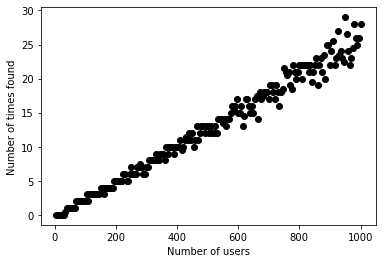

In [103]:
plt.figure()
y = test.median_times_found
x= test.nb_people
ax = plt.plot(x, y, 'ko')
#ax.set(xlabel='Number of users', ylabel='Days to be found')
plt.xlabel("Number of users")
plt.ylabel("Number of times found")
#plt.legend()
plt.show()
#ax.plot(x,y)

C:\Users\amichal\Anaconda3\envs\phd_env\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning:

divide by zero encountered in log



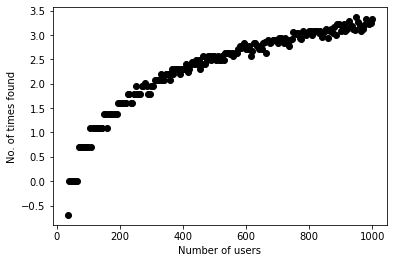

In [104]:
plt.figure()
y = test.median_times_found
x= test.nb_people
ax = plt.plot(x, np.log(y), 'ko')
#ax.set(xlabel='Number of users', ylabel='Days to be found')
plt.xlabel("Number of users")
plt.ylabel("No. of times found")
#plt.legend()
plt.show()
#ax.plot(x,y)